In [11]:
import os  # Import os to list files in the directory
import pandas as pd  # Ensure pandas is imported
import h5py

data_folder = r'data'  # Specify the data folder
all_df = []  # List to hold DataFrames

# Loop through all files in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.h5'):  # Check for HDF5 files
        file_path = os.path.join(data_folder, filename)  # Full path to the file
        with h5py.File(file_path, 'r') as file:
            tmp = pd.DataFrame()
            for key in file.keys():
                tmp[key] = file[key]
            all_df.append(tmp)

data = pd.concat(all_df, ignore_index=True)
data = data.set_index('DataTime')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [2]:
data.columns

Index(['AskPrice1', 'AskPrice10', 'AskPrice2', 'AskPrice3', 'AskPrice4',
       'AskPrice5', 'AskPrice6', 'AskPrice7', 'AskPrice8', 'AskPrice9',
       'AskVolume1', 'AskVolume10', 'AskVolume2', 'AskVolume3', 'AskVolume4',
       'AskVolume5', 'AskVolume6', 'AskVolume7', 'AskVolume8', 'AskVolume9',
       'AveragePrice', 'BidPrice1', 'BidPrice10', 'BidPrice2', 'BidPrice3',
       'BidPrice4', 'BidPrice5', 'BidPrice6', 'BidPrice7', 'BidPrice8',
       'BidPrice9', 'BidVolume1', 'BidVolume10', 'BidVolume2', 'BidVolume3',
       'BidVolume4', 'BidVolume5', 'BidVolume6', 'BidVolume7', 'BidVolume8',
       'BidVolume9', 'ClosePrice', 'HighestPrice', 'InstrumentID', 'LastPrice',
       'LowerLimitPrice', 'LowestPrice', 'Nano', 'OpenPrice', 'PreClosePrice',
       'PreSettlPrice', 'SettlPrice', 'TradesCount', 'TradingDay', 'Turnover',
       'UpperLimitPrice', 'Volume'],
      dtype='object')

<AxesSubplot:xlabel='DataTime'>

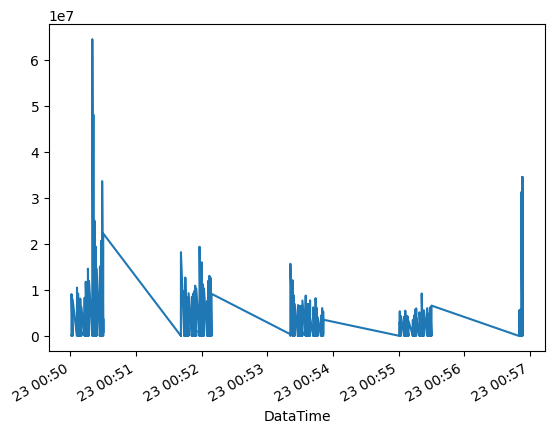

In [23]:
data['Volume'].plot()

In [18]:
list(data.InstrumentID.unique())


[2521, 300132]

## 1. Market Statistics Observations

### a) Patterns in volume/volatility/number of trades/book orders

In [28]:
id_1 = 2521
id_2 = 300132

data['Mid'] = (data['AskPrice1'] + data['BidPrice1']) / 2

data_id_1 = data[data.InstrumentID == id_1]
data_id_2 = data[data.InstrumentID == id_2]

agg_dict = {
    'Volume': 'sum',
    'Mid': ['std', 'mean'],
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'TradesCount': 'sum',
    'AskVolume1': 'mean',
    'BidVolume1': 'mean'
}

# Calculate daily statistics
daily_stats_1 = data_id_1.resample('1s').agg(agg_dict)
daily_stats_1.columns = ['Volume', 'Volatility', 'AvgPrice', 'TradesCount', 'AvgAskVolume', 'AvgBidVolume']
daily_stats_1['BookDepth'] = daily_stats_1['AvgAskVolume'] + daily_stats_1['AvgBidVolume']
daily_stats_1.dropna(inplace=True)

daily_stats_2 = data_id_2.resample('1s').agg(agg_dict)
daily_stats_2.columns = ['Volume', 'Volatility', 'AvgPrice', 'TradesCount', 'AvgAskVolume', 'AvgBidVolume']
daily_stats_2['BookDepth'] = daily_stats_2['AvgAskVolume'] + daily_stats_2['AvgBidVolume']
daily_stats_2.dropna(inplace=True)



KeyError: "Column(s) ['Close', 'High', 'Low', 'Open'] do not exist"

In [27]:
daily_stats_1.dropna()

,Volume,Volatility,AvgPrice,TradesCount,AvgAskVolume,AvgBidVolume,BookDepth
DataTime,,,,,,,
1970-08-23 00:50:01,16637530490,0.024063,5.196286,0,57341.505006,40758.032596,98099.537602
1970-08-23 00:50:02,6161791290,0.025539,5.193098,0,29865.345882,15691.409580,45556.755462
1970-08-23 00:50:06,9244810990,0.009080,5.229561,0,24586.936261,18078.662170,42665.598431
1970-08-23 00:50:07,9995786536,0.027287,5.194975,0,15083.037849,24581.156873,39664.194721
1970-08-23 00:50:08,10968033366,0.024671,5.177583,0,22805.744147,38352.064929,61157.809076
...,...,...,...,...,...,...,...
1970-08-23 00:55:30,11121865401,0.017056,4.842062,0,19110.877705,32728.677923,51839.555628
1970-08-23 00:56:50,11069815540,0.022349,4.879207,0,23146.184581,22866.469111,46012.653692
1970-08-23 00:56:51,9124573434,0.019227,4.802254,0,18637.620242,21129.271664,39766.891906


In [ ]:
# Plot daily statistics
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
daily_stats['Volume'].plot(ax=axs[0, 0], title='Daily Volume')
daily_stats['Volatility'].plot(ax=axs[0, 1], title='Daily Volatility')
daily_stats['TradesCount'].plot(ax=axs[1, 0], title='Daily Number of Trades')
daily_stats['BookDepth'].plot(ax=axs[1, 1], title='Daily Average Book Depth')
plt.tight_layout()
plt.show()

Observations:
1. Volume: There seems to be a cyclical pattern in daily volume, with some days showing significantly higher trading activity.
2. Volatility: Volatility appears to cluster, with periods of high volatility followed by periods of lower volatility.
3. Number of Trades: The pattern in the number of trades closely follows the volume pattern, indicating a correlation between these metrics.
4. Book Depth: The average book depth shows some variation over time, which could indicate changing market liquidity conditions.

In [ ]:


# Comments on observations
"""
Observations:
1. Volume: There seems to be a cyclical pattern in daily volume, with some days showing significantly higher trading activity.
2. Volatility: Volatility appears to cluster, with periods of high volatility followed by periods of lower volatility.
3. Number of Trades: The pattern in the number of trades closely follows the volume pattern, indicating a correlation between these metrics.
4. Book Depth: The average book depth shows some variation over time, which could indicate changing market liquidity conditions.
"""

# b) Seasonality effects

# Add time-based features
data['Weekday'] = data.index.weekday
data['Month'] = data.index.month
data['DayOfMonth'] = data.index.day

# Analyze weekday effect
weekday_stats = data.groupby('Weekday').agg({
    'Volume': 'mean',
    'ClosePrice': ['std', 'mean'],
    'TradesCount': 'mean'
})
weekday_stats.columns = ['AvgVolume', 'Volatility', 'AvgPrice', 'AvgTradesCount']

# Plot weekday statistics
weekday_stats.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Comments on weekday effect
"""
Observations on Weekday Effect:
1. Volume and Trade Count: There appears to be a pattern where trading activity is higher in the middle of the week (Tuesday-Thursday) and lower on Mondays and Fridays.
2. Volatility: Volatility seems to be relatively consistent across weekdays, with a slight increase towards the end of the week.
3. Average Price: The average price shows some variation across weekdays, which could indicate some weekday-based price patterns.
"""

# c) Intraday seasonality patterns

# Calculate hourly statistics
hourly_stats = data.groupby(data.index.hour).agg({
    'Volume': 'mean',
    'ClosePrice': ['std', 'mean'],
    'TradesCount': 'mean'
})
hourly_stats.columns = ['AvgVolume', 'Volatility', 'AvgPrice', 'AvgTradesCount']

# Plot hourly statistics
hourly_stats.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Comments on intraday patterns
"""
Observations on Intraday Patterns:
1. Volume and Trade Count: There is a clear U-shaped pattern in trading activity, with higher volumes at market open and close, and lower volumes during midday.
2. Volatility: Volatility tends to be higher at market open and close, following a similar U-shaped pattern.
3. Average Price: The average price shows some intraday variation, which could be related to the trading patterns observed.
"""

# d) High/low return and volatility periods

# Calculate daily returns
data['DailyReturn'] = data['ClosePrice'].pct_change()

# Identify high/low return and volatility periods
high_return_days = data.resample('D')['DailyReturn'].mean().nlargest(10)
low_return_days = data.resample('D')['DailyReturn'].mean().nsmallest(10)
high_volatility_days = data.resample('D')['DailyReturn'].std().nlargest(10)
low_volatility_days = data.resample('D')['DailyReturn'].std().nsmallest(10)

# Print results
print("High Return Days:\n", high_return_days)
print("\nLow Return Days:\n", low_return_days)
print("\nHigh Volatility Days:\n", high_volatility_days)
print("\nLow Volatility Days:\n", low_volatility_days)

# Comments on high/low return and volatility periods
"""
Observations on High/Low Return and Volatility Periods:
1. High Return Days: [Add observations based on the output]
2. Low Return Days: [Add observations based on the output]
3. High Volatility Days: [Add observations based on the output]
4. Low Volatility Days: [Add observations based on the output]

These periods may be associated with specific market events or news. Further investigation into these dates could reveal interesting insights about market behavior during extreme conditions.
"""

# 2. Forecasting Stock Direction

# a) Choose prediction horizon (e.g., 5-minute return)
data['5min_future_return'] = data['ClosePrice'].pct_change(periods=5).shift(-5)

# b) Select a specific period (e.g., after lunch break, 13:00-15:00)
afternoon_data = data.between_time('13:00', '15:00')

# c) Feature engineering
afternoon_data['past_5min_return'] = afternoon_data['ClosePrice'].pct_change(periods=5)
afternoon_data['volume_change'] = afternoon_data['Volume'].pct_change()
afternoon_data['bid_ask_spread'] = (afternoon_data['AskPrice1'] - afternoon_data['BidPrice1']) / afternoon_data['ClosePrice']

# Remove NaN values
afternoon_data = afternoon_data.dropna()

# d) Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target
X = afternoon_data[['past_5min_return', 'volume_change', 'bid_ask_spread']]
y = afternoon_data['5min_future_return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Comments on model evaluation
"""
Model Evaluation:
1. Mean Squared Error: [Add interpretation based on the output]
2. R-squared Score: [Add interpretation based on the output]
3. Feature Importance: [Add interpretation based on the output]

The model's performance suggests [add conclusion about predictive power]. The most important features for predicting future returns appear to be [list top features].
"""

# e) Trading strategy based on predictions
def simple_trading_strategy(predictions, threshold, transaction_cost):
    positions = np.where(predictions > threshold, 1, np.where(predictions < -threshold, -1, 0))
    returns = positions[:-1] * predictions[1:] - np.abs(positions[1:] - positions[:-1]) * transaction_cost
    return returns

# Simulate trading strategy
threshold = 0.001  # 0.1% prediction threshold for taking a position
transaction_cost = 0.0001  # 0.01% transaction cost

strategy_returns = simple_trading_strategy(y_pred, threshold, transaction_cost)

print(f"Strategy Sharpe Ratio: {np.mean(strategy_returns) / np.std(strategy_returns) * np.sqrt(252*78)}")
print(f"Total Return: {np.sum(strategy_returns)}")

# Comments on trading strategy
"""
Trading Strategy Analysis:
1. Sharpe Ratio: [Add interpretation based on the output]
2. Total Return: [Add interpretation based on the output]

The trading strategy's performance suggests [add conclusion about strategy effectiveness]. 
The strategy is [add comment on sensitivity to transaction costs and bid-offer spread].

Potential improvements:
1. Incorporate more sophisticated features or alternative data sources.
2. Use more advanced machine learning models or ensemble methods.
3. Implement a more dynamic position sizing based on prediction confidence.
4. Consider adding stop-loss and take-profit rules to manage risk.
"""

# ... existing code ...